**Seleccion de variables y modelos, Analisis de Seguros**

Angela Chamorro

Vladimir Martin

Analitica 3

UdeA 2023-2

#Preliminares

##Carga de paquetes y funciones

In [2]:
import pandas as pd ### para manejo de datos
import sqlite3 as sql
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_error, r2_score
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import numpy as np
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder ## escalar variables
import openpyxl
from google.colab import files

##Carga de Base de datos

Subir al entorno base de datos "df_completa_modelo.csv" generada del archivo preprocesamiento_seguros.jpynb

In [3]:
#base de datos de Utilizaciones medicas
df_completa_modelo = pd.read_csv("df_completa_modelo.csv", sep=",")


In [ ]:
df_completa_modelo.head(2)

,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones,Sexo_Cd,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,mes_rec,año_rec,mes_nac,Edad
0,R14,N649,1,139376,1.0,40,0.0,0.0,0.0,0.0,0.0,10,2019,5,40.47
1,R14,R529,1,135179,1.0,40,0.0,0.0,0.0,0.0,0.0,12,2019,4,40.69


#Transformaciones

In [ ]:
df_completa_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100673 entries, 0 to 100672
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Reclamacion_Cd        100673 non-null  object 
 1   Diagnostico_Codigo    100673 non-null  object 
 2   Numero_Utilizaciones  100673 non-null  int64  
 3   Valor_Utilizaciones   100673 non-null  int64  
 4   Sexo_Cd               100673 non-null  float64
 5   Regional              100673 non-null  int64  
 6   CANCER                100673 non-null  float64
 7   EPOC                  100673 non-null  float64
 8   DIABETES              100673 non-null  float64
 9   HIPERTENSION          100673 non-null  float64
 10  ENF_CARDIOVASCULAR    100673 non-null  float64
 11  mes_rec               100673 non-null  int64  
 12  año_rec               100673 non-null  int64  
 13  mes_nac               100673 non-null  int64  
 14  Edad                  100673 non-null  float64
dtype

In [4]:
#creamos dummies de variables categoricas
lista_dummies=["Reclamacion_Cd","Diagnostico_Codigo","Regional"]
df_completa_modelo=pd.get_dummies(df_completa_modelo,columns=lista_dummies)

In [5]:
#Escalado de variables
y=df_completa_modelo.Valor_Utilizaciones # variable respuesta
X1= df_completa_modelo.loc[:,~df_completa_modelo.columns.isin(['Valor_Utilizaciones'])]# se seleccionan todas las columnas menos las que estan en parentesis
scaler=StandardScaler() #se selecciona el escalado o estandarizacion de variables
scaler.fit(X1) # se ajusta a la base
X2=scaler.transform(X1)#se aplica a la base
X=pd.DataFrame(X2,columns=X1.columns) #se vuelve a convertir en df pandas

In [6]:
#creamos lista con nombres de col ya con dummies
nombres_dumm=X.columns.tolist()

#se guarda y exporta lista si no se ha hecho

#joblib.dump(nombres_dumm, "nombres_dumm.pkl")
#descargar lista
#files.download('nombres_dumm.pkl')

In [ ]:
len(nombres_dumm)

3444

In [7]:
#se convierte en df pandas para mejor visualizacion
y=pd.DataFrame(y,columns=["Valor_Utilizaciones"])

In [ ]:
y.head(3)

,Valor_Utilizaciones
0,139376
1,135179
2,61854


#Modelos

##Bases de datos

In [ ]:
#variable respuesta
y.head(3)

,Valor_Utilizaciones
0,139376
1,135179
2,61854


In [ ]:
#Explicativas
X.head()

Numero_Utilizaciones   Sexo_Cd    CANCER     EPOC  DIABETES  HIPERTENSION  \
0             -0.149534 -0.782721 -0.284799 -0.13862 -0.302893     -0.489553   
1             -0.149534 -0.782721 -0.284799 -0.13862 -0.302893     -0.489553   
2             -0.149534 -0.782721 -0.284799 -0.13862 -0.302893     -0.489553   
3             -0.149534  1.277595 -0.284799 -0.13862 -0.302893      2.042678   
4             -0.149534 -0.782721 -0.284799 -0.13862 -0.302893      2.042678   

   ENF_CARDIOVASCULAR   mes_rec   año_rec   mes_nac      Edad  \
0           -0.122901  0.318966  0.061842 -0.455001 -0.127939   
1           -0.122901  1.413063  0.061842 -0.743070 -0.117031   
2           -0.122901  1.413063  0.061842  0.985349  1.193342   
3           -0.122901 -0.775132  0.061842  0.985349  0.536420   
4           -0.122901  1.413063  0.061842 -0.743070  0.226056   

   Reclamacion_Cd_R12  Reclamacion_Cd_R13  Reclamacion_Cd_R14  \
0           -0.015117           -0.003152            0.994324   
1           -0.015117           -0.003152            0.994324   
2           -0.015117           -0.003152            0.994324   
3           -0.015117           -0.003152            0.994324   
4           -0.015117           -0.003152           -1.005708   

   Reclamacion_Cd_R16  Reclamacion_Cd_R19  Reclamacion_Cd_R2  \
0           -0.003152           -0.025613          -0.112535   
1           -0.003152           -0.025613          -0.112535   
2           -0.003152           -0.025613          -0.112535   
3           -0.003152           -0.025613          -0.112535   
4           -0.003152           -0.025613          -0.112535   

   Reclamacion_Cd_R20  Reclamacion_Cd_R21  Reclamacion_Cd_R22  \
0            -0.12696           -0.013739            -0.12315   
1            -0.12696           -0.013739            -0.12315   
2            -0.12696           -0.013739            -0.12315   
3            -0.12696           -0.013739            -0.12315   
4            -0.12696           -0.013739            -0.12315   

   Reclamacion_Cd_R23  Reclamacion_Cd_R24  Reclamacion_Cd_R25  \
0           -0.112897           -0.003152           -0.193296   
1           -0.112897           -0.003152           -0.193296   
2           -0.112897           -0.003152           -0.193296   
3           -0.112897           -0.003152           -0.193296   
4           -0.112897           -0.003152            5.173413   

   Reclamacion_Cd_R26  Reclamacion_Cd_R27  Reclamacion_Cd_R28  \
0           -0.037716            -0.00772           -0.026378   
1           -0.037716            -0.00772           -0.026378   
2           -0.037716            -0.00772           -0.026378   
3           -0.037716            -0.00772           -0.026378   
4           -0.037716            -0.00772           -0.026378   

   Reclamacion_Cd_R29  Reclamacion_Cd_R3  Reclamacion_Cd_R30  \
0           -0.030244          -0.032619           -0.219363   
1           -0.030244          -0.032619           -0.219363   
2           -0.030244          -0.032619           -0.219363   
3           -0.030244          -0.032619           -0.219363   
4           -0.030244          -0.032619           -0.219363   

   Reclamacion_Cd_R31  Reclamacion_Cd_R32  Reclamacion_Cd_R33  \
0           -0.005459            -0.04244           -0.031215   
1           -0.005459            -0.04244           -0.031215   
2           -0.005459            -0.04244           -0.031215   
3           -0.005459            -0.04244           -0.031215   
4           -0.005459            -0.04244           -0.031215   

   Reclamacion_Cd_R34  Reclamacion_Cd_R35  Reclamacion_Cd_R36  \
0           -0.172161           -0.004457           -0.047539   
1           -0.172161           -0.004457           -0.047539   
2           -0.172161           -0.004457           -0.047539   
3           -0.172161           -0.004457           -0.047539   
4           -0.172161           -0.004457           -0.047539   

   Reclamacion_

##Seleccion de variables y modelos

se va a hacer una seleccion de variables para probar el desempeño de los modelos con y sin seleccion de variables

In [8]:
#funcion usada para la seleccion de variables
def sel_variables(modelos,X,y,threshold):

    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)

    return var_names_ac

In [9]:
#vamos a probar 4 tipos de modelos
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

In [ ]:
#tamaño de la base de datos sin seleccion de variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100673 entries, 0 to 100672
Columns: 3444 entries, Numero_Utilizaciones to Regional_50
dtypes: float64(3444)
memory usage: 2.6 GB


In [10]:
#se crea una lista de los modelos a evaluar
modelos=list([m_lreg,m_rtree, m_rf, m_gbt])


In [11]:
#por su alta duracion, se corre e importa con anterioridad
#si ya se tiene creada la lista, se importa
var_names=joblib.load("var_names.pkl")

In [ ]:
#se crea una lista con las variables seleccionadas segun su importancia en los modelos, en este caso se usa el filtro 1.8*mean, el puntaje de importancia debe superar el 80% del promedio de puntajes
var_names=sel_variables(modelos,X,y,threshold="1.8*mean")
var_names.shape
#exportar la lista de variables seleccionadas, ya que la corrida de cada sel_var dura mas de 1 hora
joblib.dump(var_names, "var_names.pkl")
#descargar lista
files.download('var_names.pkl')

<ipython-input-8-9142b2d38751>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X,y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#dataframe con variables seleccionadas
X2=X[var_names]

In [ ]:
#tamaño de la base de datos con seleccion de variables
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100673 entries, 0 to 100672
Columns: 493 entries, CANCER to mes_rec
dtypes: float64(493)
memory usage: 378.7 MB


pasamos de tener un df con 3444 variables a uno con 493

In [13]:
#funcion para evaluar los modelos mediante cross validation, con los parametros de split por defecto.
def medir_modelos(modelos,scoring,X,y,cv):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)

    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos

In [15]:
#por su alta duracion, se corre e importa con anterioridad
#si ya se tiene la validacion, se importa
rmse_X2=joblib.load("rmse_X2.pkl")

In [ ]:
#se realiza validacion cruzada con metrica negative rmse
rmse_X2=medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10) ### base con variables seleccionadas
#guardar esta validacion cruzada para usarla mas adelante
joblib.dump(rmse_X2, "rmse_X2.pkl")
#descargar la validacion
files.download('rmse_X2.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rmse_X2.head(2)

,reg_lineal,decision_tree,random_forest,gradient_boosting
0,-4294.982707,-5565.465554,-4182.671713,-4570.950730
1,-4347.529392,-5590.916927,-4260.242770,-4620.380926


In [16]:
#se crea df con todos los resultados de rmse para todos los modelos
rmse=rmse_X2
rmse.columns=['rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

#rl:regr lineal, dt:dec tree, rf:random Forest, gb:gradient boosting, sel:con variables seleccionadas

rl_Sel   -7.983767e+17
dt_sel   -6.524508e+06
rf_sel   -5.271749e+06
gb_Sel   -5.266849e+06
dtype: float64

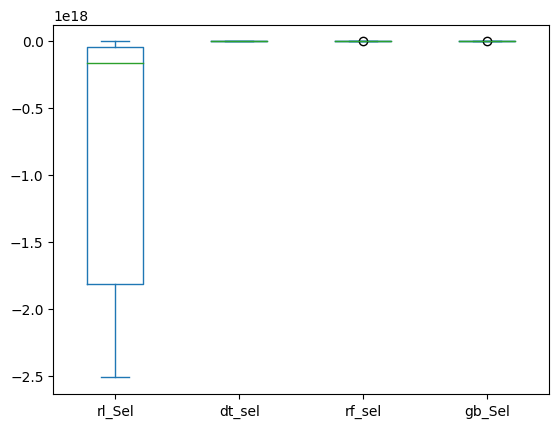

In [17]:
#grafico de rmse
rmse_X2.plot(kind='box') ### gráfico para modelo variables seleccionadas
rmse.mean()

podemos ver de lo anterior que el mejor modelo es dt.

In [22]:
m_rtree=m_rtree.fit(X2,y)

In [23]:
m_rtree.score(X2,y)

0.9973239614379255

In [24]:
#se guarda y exporta modelo entrenado
joblib.dump(m_rtree, "m_rtree.pkl")
#descargar el modelo
files.download('m_rtree.pkl')
#para cargar de nuevo modelo entrenado
#m_rtree = joblib.load("m_rtree.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Exportar archivo a HTML

In [ ]:
#exportar a html
%%shell
jupyter nbconvert --to html "/content/preprocesamiento_seguros (1).ipynb"